In [3]:
from coldquanta.qiskit_tools.modeling.neutral_atom_noise_model import create_noise_model
from coldquanta.qiskit_tools.coldquanta_sim_backend import ColdQuantaSimBackend

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import math

In [4]:
# Instead of using the built in transpiler, explicitly define
def na_h(c, q):
    # H on q1
    c.r(q=q, phi=math.pi / 2, theta=math.pi / 2)
    c.r(q=q, phi=0.0, theta=math.pi)

def na_cnot(c, q0, q1):
    # H on q1
    na_h(c, q1)
    # CZ
    c.cz(q0, q1)
    # H on q1
    na_h(c, q1)

#create a circuit
bell = QuantumCircuit(4)

na_h(bell, 0)
for i in range(3):
    na_cnot(bell, i, i+1)

bell.measure_all()

/Users/anthonypolloreno/.pyenv/versions/3.7.4/envs/qaoa_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: r keyword argument q is deprecated and replaced with qubit.
  after removing the cwd from sys.path.
/Users/anthonypolloreno/.pyenv/versions/3.7.4/envs/qaoa_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: r keyword argument q is deprecated and replaced with qubit.
  """


In [12]:
noise_model

NoiseModel:
  Basis gates: ['cx', 'cz', 'id', 'u3']
  Instructions with noise: ['id', 'cz', 'r', 'rz']
  All-qubits errors: ['r', 'rz', 'id', 'cz']

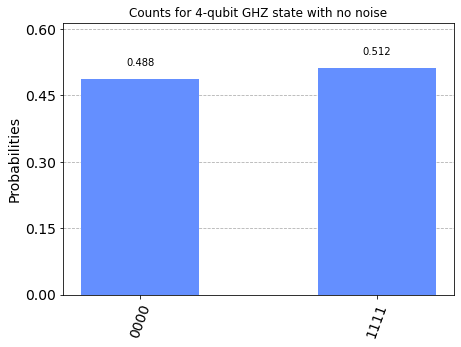

In [5]:
neutral_atom = ColdQuantaSimBackend(rows=2, cols=2)
neutral_atom_config = neutral_atom.configuration()
coupling_map = neutral_atom_config.coupling_map

simulator = Aer.get_backend('qasm_simulator')

result_noise_free = execute(bell,
                       simulator,
                       coupling_map=coupling_map,
                       optimization_level=0).result()

counts_noise_free = result_noise_free.get_counts()

plot_histogram(counts_noise_free, title="Counts for 4-qubit GHZ state with no noise")

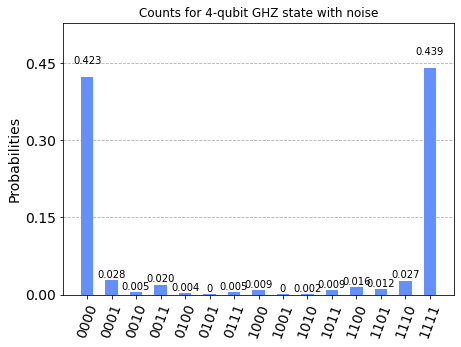

In [6]:
# simulate with neutral atom noise model

# use defaults
noise_model = create_noise_model()


result_noise = execute(bell,
                       simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       optimization_level=0,
                       shots=1024).result()

counts_noise = result_noise.get_counts()

plot_histogram(counts_noise, title="Counts for 4-qubit GHZ state with noise")


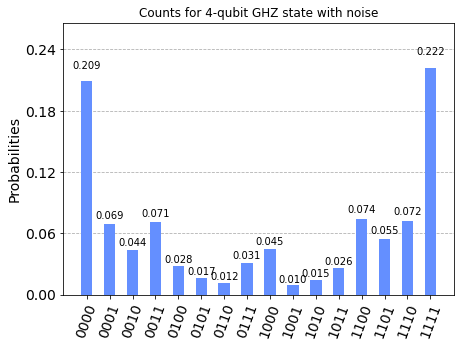

In [7]:
# Adjust noise characteristics

# decrease cz fidelity from the 0.95 default to 0.7
noise_model = create_noise_model(cz_fidelity=0.7)


result_noise = execute(bell,
                       simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       optimization_level=0,
                       shots=1024).result()

counts_noise = result_noise.get_counts()

# Note how noise states increase in count
plot_histogram(counts_noise, title="Counts for 4-qubit GHZ state with noise")



In [8]:
noise_model

NoiseModel:
  Basis gates: ['cx', 'cz', 'id', 'u3']
  Instructions with noise: ['id', 'cz', 'r', 'rz']
  All-qubits errors: ['r', 'rz', 'id', 'cz']